In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.decomposition import PCA
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix



In [2]:
# Read a feature space
LO_nonover = pd.read_csv('/Users/bhuvanakorrapati/Desktop/output/merge_LO.csv',header=None)

LO_over = pd.read_csv('/Users/bhuvanakorrapati/Desktop/output/overlapping_merge_LO.csv',header=None)

LOA_nonover = pd.read_csv('/Users/bhuvanakorrapati/Desktop/output/merge_LOA.csv',header=None)

LOA_over = pd.read_csv('/Users/bhuvanakorrapati/Desktop/output/overlapping_merge_LOA.csv',header=None)



### Spliting testing and training data by 80 and 20 

In [3]:
train_LO_nonover = LO_nonover.sample(frac=0.8)
test_LO_nonover = LO_nonover.drop(train_LO_nonover.index)


In [4]:
train_LO_nonover.shape

(564, 145)

In [5]:
test_LO_nonover.shape


(141, 145)

In [6]:
train_LO_nonover.to_csv('/Users/bhuvanakorrapati/Desktop/output1/train_LO_nonover.csv', index=False)

In [7]:
test_LO_nonover.to_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LO_nonover.csv', index=False)


In [8]:
train_LO_over = LO_over.sample(frac=0.8)
test_LO_over = LO_over.drop(train_LO_over.index)

In [9]:
train_LO_over.shape


(72577, 145)

In [10]:
test_LO_over.shape

(18144, 145)

In [11]:
train_LO_over.to_csv('/Users/bhuvanakorrapati/Desktop/output1/train_LO_over.csv', index=False)
test_LO_over.to_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LO_over.csv', index=False)

In [12]:
train_LOA_nonover = LOA_nonover.sample(frac=0.8)
test_LOA_nonover = LOA_nonover.drop(train_LOA_nonover.index)



In [13]:
train_LOA_nonover.shape

(846, 145)

In [14]:
test_LOA_nonover.shape

(211, 145)

In [15]:
train_LOA_nonover.to_csv('/Users/bhuvanakorrapati/Desktop/output1/train_LOA_nonover.csv', index=False)

test_LOA_nonover.to_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LOA_nonover.csv', index=False)


In [16]:
train_LOA_over = LO_over.sample(frac=0.8)
test_LOA_over = LO_over.drop(train_LOA_over.index)

In [17]:
train_LOA_over.shape



(72577, 145)

In [18]:
test_LOA_over.shape



(18144, 145)

In [19]:
train_LOA_over.to_csv('/Users/bhuvanakorrapati/Desktop/output1/train_LOA_over.csv', index=False)
test_LOA_over.to_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LOA_over.csv', index=False)

train_LO_nonover 
test_LO_nonover

train_LO_over 
test_LO_over

train_LOA_nonover 
test_LOA_nonover

train_LOA_over 
test_LOA_over



### Select features from dataset and check if they are correlated


In [20]:
df_LO = train_LO_nonover .iloc[:, :-1]


In [21]:
df_LO.describe()


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.00000,564.000000,...,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,136.762411,136.035461,136.407801,136.393617,136.645390,136.936170,137.586879,137.881206,136.50000,136.730496,...,137.570922,136.656028,136.815603,136.421986,136.656028,137.040780,136.289007,137.365248,137.358156,137.664894
std,45.760364,45.558178,46.718807,46.511074,46.244102,46.736625,45.903883,45.863436,46.26142,47.088350,...,45.954417,46.430859,46.158635,45.930513,46.112598,45.778524,46.144223,45.908333,45.890356,45.662241
min,12.000000,12.000000,4.000000,4.000000,4.000000,5.000000,7.000000,6.000000,5.00000,4.000000,...,11.000000,5.000000,3.000000,4.000000,6.000000,8.000000,7.000000,5.000000,7.000000,13.000000
25%,108.000000,108.000000,108.000000,109.000000,110.000000,108.000000,110.000000,112.000000,109.00000,109.000000,...,109.000000,107.000000,108.000000,107.000000,108.000000,108.000000,109.000000,109.000000,109.000000,109.750000
50%,143.000000,140.000000,142.000000,140.500000,142.500000,143.000000,145.000000,145.500000,143.00000,143.000000,...,144.000000,140.000000,141.000000,141.000000,143.000000,142.000000,139.000000,143.000000,143.000000,143.000000
75%,170.000000,171.000000,172.000000,171.250000,171.000000,172.000000,171.000000,170.000000,170.00000,171.000000,...,172.000000,172.000000,171.000000,171.250000,171.250000,172.000000,172.000000,172.000000,174.000000,172.000000
max,249.000000,223.000000,233.000000,227.000000,246.000000,245.000000,242.000000,237.000000,236.00000,241.000000,...,237.000000,225.000000,235.000000,239.000000,237.000000,229.000000,228.000000,237.000000,228.000000,236.000000


In [22]:
df1 = df_LO.sample(axis='columns',replace='True')

In [23]:
df1.shape

(564, 1)

In [24]:
print(df1)


      43
192  111
619  138
99   107
356  102
140  202
..   ...
646  158
597  171
259  173
299   60
485   22

[564 rows x 1 columns]


In [25]:
df2 = df_LO.sample(axis='columns', replace='True')


In [26]:
df1_mean = df1.mean()
df2_mean = df2.mean()


In [27]:
print(df1_mean)
print(df2_mean)


43    136.874113
dtype: float64
47    137.285461
dtype: float64


In [28]:
df1_std = df1.std()
df2_std = df2.std()


In [29]:
print(df1_std)
print(df2_std)


43    46.398308
dtype: float64
47    45.708223
dtype: float64


In [30]:
df5 = test_LO_nonover.iloc[:, :-1]


In [31]:
df3 = df5.sample(axis='columns',replace='True')
df4 = df5.sample(axis='columns',replace='True')


In [32]:
df3_mean = df3.mean()
df4_mean = df4.mean()


In [33]:
print(df3_mean)
print(df4_mean)



41    133.716312
dtype: float64
102    130.460993
dtype: float64


In [34]:
df3_std = df3.std()
df4_std = df4.std()


In [35]:
print(df3_std)
print(df4_std)



41    44.738977
dtype: float64
102    46.407899
dtype: float64


array([[<AxesSubplot:title={'center':'47'}>]], dtype=object)

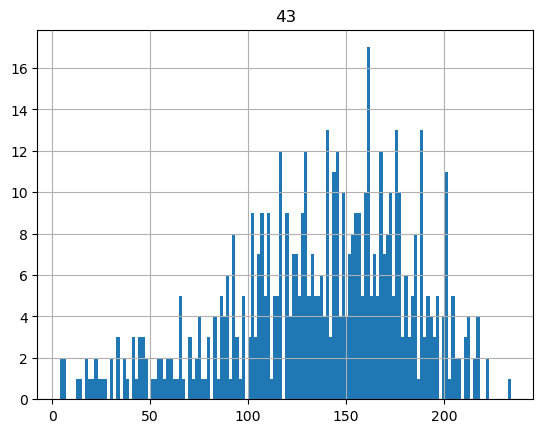

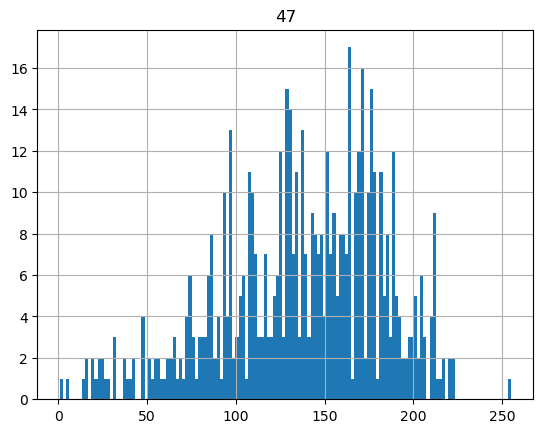

In [36]:
random_value=np.random.randint(144)
df1.hist(bins=144)
df2.hist(bins=144)



array([[<AxesSubplot:title={'center':'102'}>]], dtype=object)

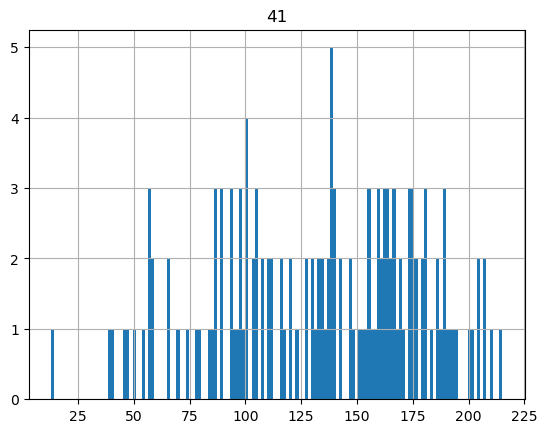

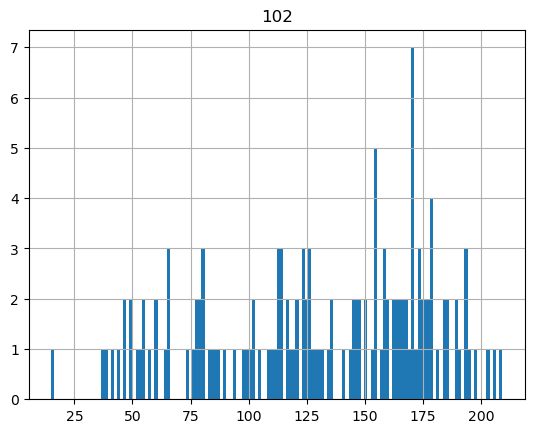

In [37]:
random_value=np.random.randint(144)
df3.hist(bins=144)
df4.hist(bins=144)



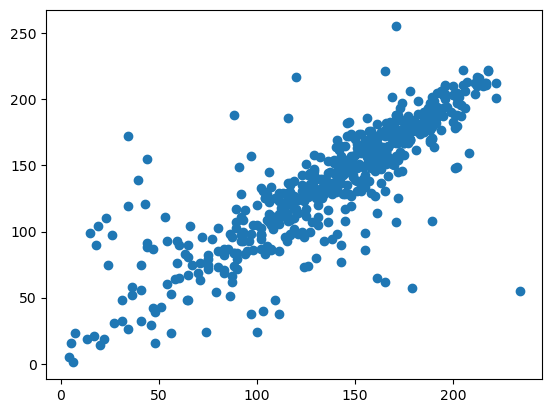

In [38]:
plt.scatter(df1, df2)

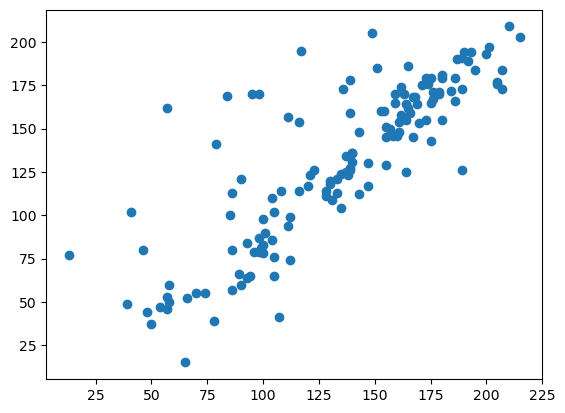

In [39]:
plt.scatter(df3,df4)

## Correlation for overlapping data of two fruits

In [40]:
df_overlapped_LO = train_LO_over .iloc[:, :-1]

In [41]:
df_overlapped_LO.describe()

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
count,72577.000000,72577.000000,72577.000000,72577.000000,72577.000000,72577.000000,72577.000000,72577.000000,72577.000000,72577.000000,...,72577.000000,72577.000000,72577.000000,72577.000000,72577.00000,72577.000000,72577.000000,72577.000000,72577.000000,72577.000000
mean,130.963156,130.769114,130.559502,130.353969,130.153506,130.053943,129.949075,129.827204,129.700525,129.605908,...,129.555548,129.400306,129.267481,129.138115,129.03406,128.910247,128.748557,128.679885,128.552186,128.526117
std,50.244637,50.410742,50.568993,50.691579,50.825115,50.904589,51.000992,51.084122,51.161944,51.208662,...,50.222349,50.327142,50.447647,50.524470,50.62122,50.718156,50.797429,50.838255,50.893592,50.963124
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,98.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,96.000000,...,97.000000,97.000000,97.000000,96.000000,96.00000,96.000000,96.000000,96.000000,95.000000,95.000000
50%,135.000000,135.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,133.000000,133.000000,133.000000,133.000000,132.00000,132.000000,132.000000,132.000000,131.000000,131.000000
75%,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,167.000000,167.000000,167.000000,167.000000,167.00000,167.000000,167.000000,167.000000,167.000000,167.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000


In [42]:
df6 = train_LO_over.iloc[:, :-1]
df7 = test_LO_over.iloc[:,:-1]


In [43]:
df8 = df6.sample(axis='columns',replace='True')
df9 = df6.sample(axis='columns',replace='True')
df10 = df7.sample(axis='columns',replace='True')
df11 = df7.sample(axis='columns',replace='True')

In [44]:
df8_mean = df8.mean()
df9_mean = df9.mean()
df10_mean = df10.mean()
df11_mean = df11.mean()

In [45]:
print(df8_mean)
print(df9_mean)
print(df10_mean)
print(df11_mean)

109    130.058228
dtype: float64
71    129.1556
dtype: float64
72    130.138944
dtype: float64
58    128.492504
dtype: float64


In [46]:
df8_std = df8.std()
df9_std = df9.std()
df10_std = df10.std()
df11_std = df11.std()

In [47]:
print(df8_std)
print(df9_std)
print(df10_std)
print(df11_std)

109    50.111814
dtype: float64
71    51.09657
dtype: float64
72    50.12893
dtype: float64
58    51.148183
dtype: float64


array([[<AxesSubplot:title={'center':'71'}>]], dtype=object)

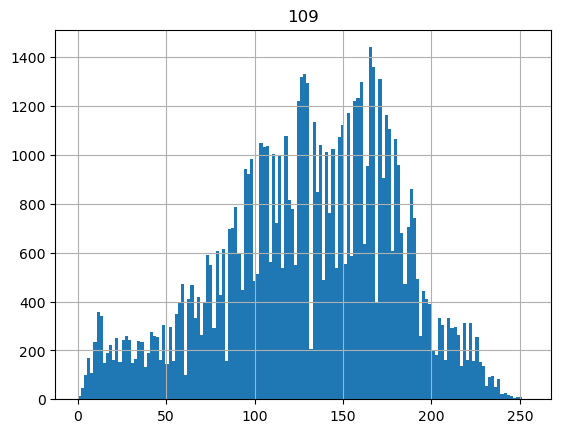

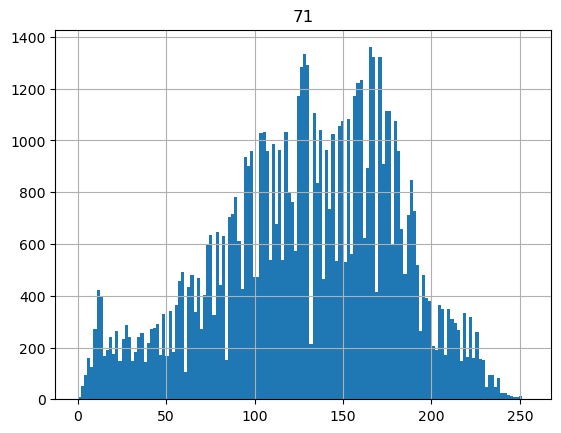

In [48]:
random_value=np.random.randint(144)
df8.hist(bins=144)
df9.hist(bins=144)

array([[<AxesSubplot:title={'center':'58'}>]], dtype=object)

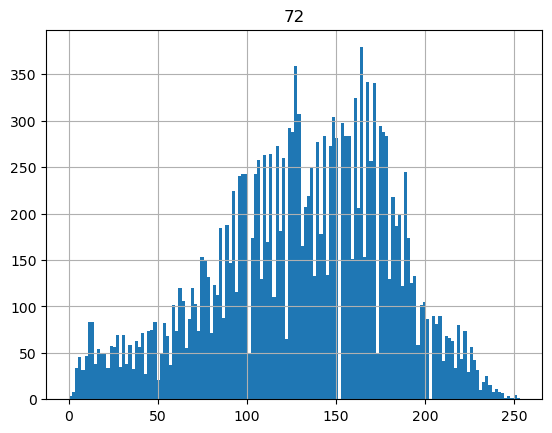

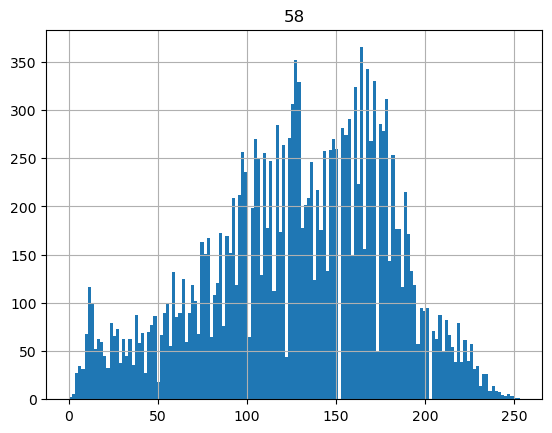

In [49]:
random_value=np.random.randint(144)
df10.hist(bins=144)
df11.hist(bins=144)

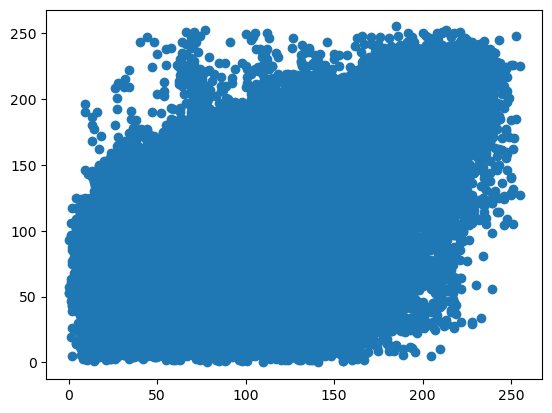

In [50]:
plt.scatter(df8,df9)

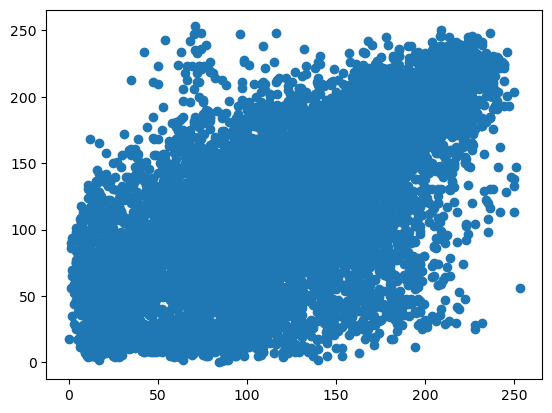

In [51]:
plt.scatter(df10,df11)

b = random.randint(1,144)
training_data[b].hist(bins=40)
print("The column number is",b)


### SCATTER PLOT

### LINEAR REGRESSION ALGORITHM


In [52]:
y = LO_over [144]


In [53]:
y.shape


(90721,)

In [54]:
# Drop the labels and store the features
LO_over .drop(144,axis=1,inplace=True)
X = LO_over 


In [55]:
# Generate feature matrix using a Numpy array
X1 = np.array(X)
X1


array([[  0,   1,   2, ..., 141, 142, 143],
       [170, 162, 161, ..., 127, 128, 130],
       [ 93, 106, 104, ..., 158,  12,  13],
       ...,
       [126, 118, 110, ...,  58,  59,  89],
       [128,  23,  26, ...,  98,  94, 114],
       [140, 148, 148, ..., 171, 179, 177]])

In [56]:
# Transpose of the feature matrix
X2 = X1.transpose()
X2


array([[  0, 170,  93, ..., 126, 128, 140],
       [  1, 162, 106, ..., 118,  23, 148],
       [  2, 161, 104, ..., 110,  26, 148],
       ...,
       [141, 127, 158, ...,  58,  98, 171],
       [142, 128,  12, ...,  59,  94, 179],
       [143, 130,  13, ...,  89, 114, 177]])

In [57]:
# Square of the feature matrix
XX = np.matmul(X2, X1)
XX


array([[1783674281, 1773270441, 1765132068, ..., 1647433793, 1641968185,
        1636302945],
       [1773270441, 1779709346, 1769375678, ..., 1649846528, 1644428019,
        1639079355],
       [1765132068, 1769375678, 1775949760, ..., 1652142298, 1646935896,
        1641638381],
       ...,
       [1647433793, 1649846528, 1652142298, ..., 1734039968, 1724616376,
        1717710356],
       [1641968185, 1644428019, 1646935896, ..., 1724616376, 1732365698,
        1723078783],
       [1636302945, 1639079355, 1641638381, ..., 1717710356, 1723078783,
        1730906015]])

In [58]:
XX.shape


(144, 144)

In [59]:
# Inverse of the square of the feature matrix
IX = inv(XX)


In [60]:
# Multiply it with its feature matrix
TX = np.matmul(X1, IX)
TX.shape


(90721, 144)

In [61]:
print(TX)


[[-3.79222664e-07 -1.34151538e-07 -1.17086192e-07 ...  1.27919343e-07
   1.45607772e-07  3.91662902e-07]
 [ 7.44698596e-07 -5.21066377e-08  8.44289337e-07 ... -7.46188661e-07
  -2.53560032e-08  8.66191195e-08]
 [ 3.14194651e-06  2.46044062e-06 -1.47991158e-06 ...  4.96005209e-06
  -9.01463496e-06 -3.65631912e-07]
 ...
 [ 2.40994228e-07 -4.48320305e-09 -1.45182192e-07 ... -9.32147624e-07
  -2.13300528e-06  8.97299805e-07]
 [ 4.56604317e-06 -5.67349473e-06 -1.47795743e-06 ...  2.53859695e-07
  -1.49537733e-06  8.52613732e-07]
 [-2.42511727e-07  4.07358984e-07 -4.37342488e-07 ... -4.39419717e-07
   4.50137284e-07  3.21820475e-08]]


In [62]:
# Generate label matrix using Numpy array
Y1 = np.array(y)
Y1.shape


(90721,)

In [63]:
# Transpose of the label matrix
Y2 = Y1.transpose()


In [64]:
# Multiply it with feature matrix related term
A = np.matmul(Y2, TX)
print(A)


[ 8.53568315e-04  2.27814985e-04  2.54695129e-04  2.39420464e-04
  2.12609469e-04  1.73316316e-04  1.97921507e-04  1.64218574e-04
  1.70673906e-04  1.80747447e-04  2.22270958e-04  8.69480586e-04
  1.12334542e-04 -2.52092463e-04 -1.40360120e-04 -1.35612944e-04
 -1.36466772e-04 -1.09185107e-04 -1.03591908e-04 -1.30834652e-04
 -1.43176258e-04 -1.44201522e-04 -2.35358569e-04  1.23646006e-04
  8.62728471e-05 -1.35344523e-04 -6.24906838e-05 -5.55340921e-05
 -3.81363856e-05 -2.63584044e-05 -5.12096727e-05 -7.70191707e-05
 -8.40142198e-05 -7.63712948e-05 -1.88115005e-04  1.41191815e-04
  1.18498786e-04 -8.72139543e-05 -2.96331111e-05 -2.87254787e-05
 -1.16550495e-06 -5.43969458e-06 -2.17594612e-05 -3.76585691e-05
 -2.34141561e-05 -4.98705437e-05 -8.23594842e-05  1.39782474e-04
  1.36815413e-04 -7.56625603e-05  1.25618719e-05  2.51575457e-05
  2.18934919e-05  8.14843986e-06  1.50248153e-05  1.85403143e-05
  5.53242123e-06 -2.02986750e-05 -5.78901856e-05  1.38527565e-04
  1.03889407e-04 -1.13337

In [65]:
# Validating the model - compare it with y[1:5]
Z1 = np.matmul(X1[0,:], A)
Z2 = np.matmul(X1[1,:], A)
Z3 = np.matmul(X1[2,:], A)
Z4 = np.matmul(X1[3,:], A)
Z5 = np.matmul(X1[4,:], A)


In [66]:
print(Z1)


0.23997885300367974


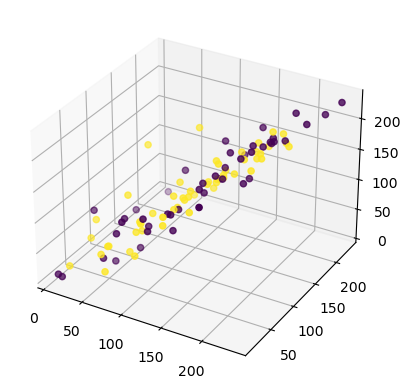

In [67]:
# Plot the original data
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
I1 = np.array(LO_over )
#ax.scatter3D(I1[:,11], I1[:,32], I1[:,59])
#ax.scatter3D(I1[:,11], I1[:,32], I1[:,59], c=I1[:,59], cmap='Greens')
NN = 100
ax.scatter3D(I1[1:NN,11], I1[1:NN,32], I1[1:NN,59], c=Y1[1:NN])
plt.show()


### ELASTIC-NET REGRESSION ALGORITHM

Our_Accuracy_Score: 0.5038759689922481
Our_Precision_Score: 0.4696969696969697
Our_Sensitivity_Score: 0.5166666666666666
Our_Specificity_Score: 0.4927536231884058


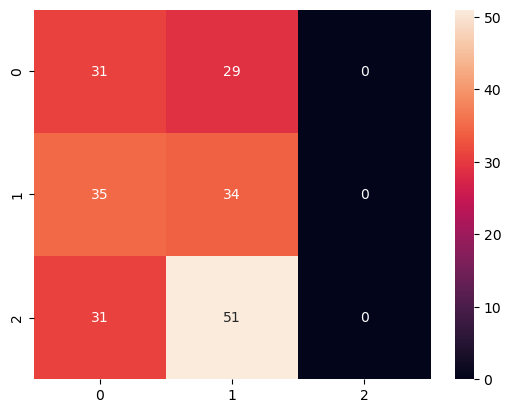

In [145]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

input_data_train = pd.read_csv("/Users/bhuvanakorrapati/Desktop/output1/train_LOA_nonover.csv",header=None)

y = input_data_train[144]

input_data_train.drop(144,axis=1,inplace=True)
X = input_data_train

X1 = np.array(X)
X2 = X1.transpose()
XX = np.matmul(X2, X1)

IX = inv(XX)
TX = np.matmul(X1, IX)

Y1 = np.array(y)
Y2 = Y1.transpose()

A = np.matmul(Y2, TX)

Œª=0.09
h=np.sign(A) 
L1=(A-(Œª/2)*h)  
LR=np.matmul(L1,IX)

Z1 = np.matmul(X1, LR)

input_data_1= pd.read_csv("/Users/bhuvanakorrapati/Desktop/output1/test_LOA_nonover.csv",header=None)[1:]
y_tt = input_data_1[144]

input_data_1

input_data_1.drop(144,axis=1,inplace=True)

X_tt = input_data_1
X_tt1=np.array(X_tt)
Z1_test=np.matmul(X_tt1,LR)
Z_mean=Z1_test>Z1_test.mean()

a_int=np.multiply(Z_mean,1)
predicted=pd.read_csv("/Users/bhuvanakorrapati/Desktop/output1/test_LOA_nonover.csv",header=None)[1:]
predicted[145]=a_int
predicted.to_csv("/Users/bhuvanakorrapati/Desktop/output1/Lasso_10_predicted.csv")
CC_test = confusion_matrix(y_tt, a_int,labels=[0,1,2])

predicted[144]

type(predicted)

sns.heatmap(CC_test, annot=True,fmt="d")

TN = CC_test[1,1]
FP = CC_test[1,0]
FN = CC_test[0,1]
TP = CC_test[0,0]

FPFN = FP+FN
TPTN = TP+TN

Accuracy = 1/(1+(FPFN/TPTN))
print("Our_Accuracy_Score:",Accuracy)
Precision = 1/(1+(FP/TP))
print("Our_Precision_Score:",Precision)
Sensitivity = 1/(1+(FN/TP))
print("Our_Sensitivity_Score:",Sensitivity)
Specificity = 1/(1+(FP/TN))
print("Our_Specificity_Score:",Specificity)



In [148]:
print(a_int)

[0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0
 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0]


In [149]:
print(Z_mean)

[False  True  True  True  True False False  True  True False  True  True
  True False False  True  True False  True  True  True False False False
  True  True  True False  True  True  True  True False  True False False
 False False  True False  True False  True  True  True  True  True  True
  True False  True  True False  True False  True False  True  True  True
  True False  True  True False False False  True  True  True  True  True
  True False  True False False  True  True False  True False False False
 False  True False  True False  True False  True  True  True  True False
 False False False False False False  True  True  True  True  True  True
  True  True False False  True  True  True False  True False False  True
 False False  True False False False False  True False False  True  True
 False  True  True  True  True False  True False False False  True  True
  True False False  True  True  True  True  True False False  True  True
 False  True False False False  True False False  T

In [146]:
print(CC_test)


[[31 29  0]
 [35 34  0]
 [31 51  0]]


### For two class non-overlapping dataset

In [68]:
LO_Train_data= pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/train_LO_nonover.csv',header=None)[1:]
LO_Test_data= pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LO_nonover.csv',header=None)[1:]
LO_Train_data[144][LO_Train_data[144]==2]=1
train_ar = LO_Train_data[144]
LO_Train_data.drop(144,axis=1,inplace=True)
X_train = LO_Train_data
l1=0.1
l2=0.2
LO_Test_data[144][LO_Test_data[144]==2]=1
test_ar = LO_Test_data[144]
LO_Test_data.drop(144,axis=1,inplace=True)
X_test = LO_Test_data
X1_test= np.array(X_test)
X1_train = np.array(X_train) #X
X2_train = X1_train.transpose() #X'
XX_train = np.matmul(X2_train, X1_train) #X*X'
Inv_X_train = inv(XX_train) #inv(X*X')
#A1=y*X' *inv(X*X')
Y_train = np.array(train_ar) #y
YX_train = np.matmul(X2_train, Y_train) #Y*X'
A1_train = np.matmul(YX_train, Inv_X_train)
S_train= np.sign(A1_train)
#A=(y*x’-(lamda2/2)*S)*inv(x*x’+lamda1)
XXL1_train = XX_train+l1
Inv_XXL1_train=inv(XXL1_train)
Temp = (l2/2)*S_train
New_temp = np.matmul(Temp,Inv_XXL1_train)
A_train = YX_train - New_temp
#Validating Model
ZZ1 = np.matmul(X1_train, A_train)
ZZ2 = ZZ1 > ZZ1.mean()
yhat = ZZ2.astype(int)
#Validating with Test data
Z1_test = np.matmul(X1_test, A_train)
Z2_test = Z1_test > Z1_test.mean()
yhat_test = Z2_test.astype(int)
New_LO_Test_data = pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LO_nonover.csv',header=None)[1:]
New_LO_Test_data[144][New_LO_Test_data[144]==2]=1
New_LO_Test_data["145"] = yhat_test
New_LO_Test_data.to_csv('/Users/bhuvanakorrapati/Desktop/output1/new_train_LO_nonover.csv',index = False)
#Confusion matrix
CC_test = confusion_matrix(test_ar, yhat_test)
#Confusion Matrix Array to Data Frame
Confusion_Matrix = pd.DataFrame(CC_test)
# save the dataframe as a csv file
Confusion_Matrix.to_csv('/Users/bhuvanakorrapati/Desktop/output1/Confuison_Matrix.csv',index = False)

print(Confusion_Matrix)
TN = CC_test[0,0]
FP = CC_test[0,1]
FN = CC_test[1,0]
TP = CC_test[1,1]
FPFN = FP+FN
TPTN = TP+TN
Accuracy = 1/(1+(FPFN/TPTN))
print("Our_Accuracy_Score:",Accuracy)
Precision = 1/(1+(FP/TP))
print("Our_Precision_Score:",Precision)
Sensitivity = 1/(1+(FN/TP))
print("Our_Sensitivity_Score:",Sensitivity)
Specificity = 1/(1+(FP/TN))
print("Our_Specificity_Score:",Specificity)


    0   1  2
0  25  46  0
1  39  30  0
2   1   0  0
Our_Accuracy_Score: 0.39285714285714285
Our_Precision_Score: 0.39473684210526316
Our_Sensitivity_Score: 0.4347826086956522
Our_Specificity_Score: 0.35211267605633806


<AxesSubplot:>

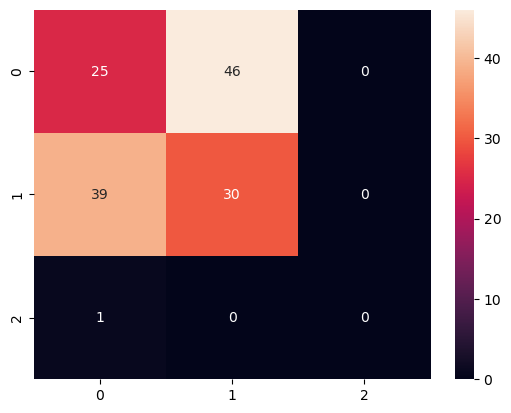

In [69]:
sns.heatmap(CC_test, annot=True)

### For two class overlapping

In [70]:
LO_overlap_Train_data= pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/train_LO_over.csv',header=None)[1:]
LO_overlap_Test_data= pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LO_over.csv',header=None)[1:]
LO_overlap_Train_data[144][LO_overlap_Train_data[144]==2]=1
train_ar = LO_overlap_Train_data[144]
LO_overlap_Train_data.drop(144,axis=1,inplace=True)
X_train = LO_overlap_Train_data
l1=0.1
l2=0.2
LO_overlap_Test_data[144][LO_overlap_Test_data[144]==2]=1
test_ar = LO_overlap_Test_data[144]
LO_overlap_Test_data.drop(144,axis=1,inplace=True)
X_test = LO_overlap_Test_data
X1_test= np.array(X_test)
X1_train = np.array(X_train) #X
X2_train = X1_train.transpose() #X'
XX_train = np.matmul(X2_train, X1_train) #X*X'
Inv_X_train = inv(XX_train) #inv(X*X')
#A1=y*X' *inv(X*X')
Y_train = np.array(train_ar) #y
YX_train = np.matmul(X2_train, Y_train) #Y*X'
A1_train = np.matmul(YX_train, Inv_X_train)
S_train= np.sign(A1_train)
#A=(y*x’-(lamda2/2)*S)*inv(x*x’+lamda1)
XXL1_train = XX_train+l1
Inv_XXL1_train=inv(XXL1_train)
Temp = (l2/2)*S_train
New_temp = np.matmul(Temp,Inv_XXL1_train)
A_train = YX_train - New_temp
#Validating Model
ZZ1 = np.matmul(X1_train, A_train)
ZZ2 = ZZ1 > ZZ1.mean()
yhat = ZZ2.astype(int)
#Validating with Test data
Z1_test = np.matmul(X1_test, A_train)
Z2_test = Z1_test > Z1_test.mean()
yhat_test = Z2_test.astype(int)
New_LO_overlap_Test_data = pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LO_over.csv',header=None)[1:]
New_LO_overlap_Test_data[144][New_LO_overlap_Test_data[144]==2]=1
New_LO_overlap_Test_data["145"] = yhat_test
New_LO_overlap_Test_data.to_csv('/Users/bhuvanakorrapati/Desktop/output1/new_train_LO_over.csv',index = False)
#Confusion matrix
CC_test = confusion_matrix(test_ar, yhat_test)
#Confusion Matrix Array to Data Frame
Confusion_Matrix = pd.DataFrame(CC_test)
# save the dataframe as a csv file
Confusion_Matrix.to_csv('/Users/bhuvanakorrapati/Desktop/output1/Confuison_Matrix.csv',index = False)

print(Confusion_Matrix)
TN = CC_test[0,0]
FP = CC_test[0,1]
FN = CC_test[1,0]
TP = CC_test[1,1]
FPFN = FP+FN
TPTN = TP+TN
Accuracy = 1/(1+(FPFN/TPTN))
print("Our_Accuracy_Score:",Accuracy)
Precision = 1/(1+(FP/TP))
print("Our_Precision_Score:",Precision)
Sensitivity = 1/(1+(FN/TP))
print("Our_Sensitivity_Score:",Sensitivity)
Specificity = 1/(1+(FP/TN))
print("Our_Specificity_Score:",Specificity)



      0     1
0  4110  4840
1  4647  4547
Our_Accuracy_Score: 0.47712742504409167
Our_Precision_Score: 0.48439330989666557
Our_Sensitivity_Score: 0.49456167065477485
Our_Specificity_Score: 0.4592178770949721


<AxesSubplot:>

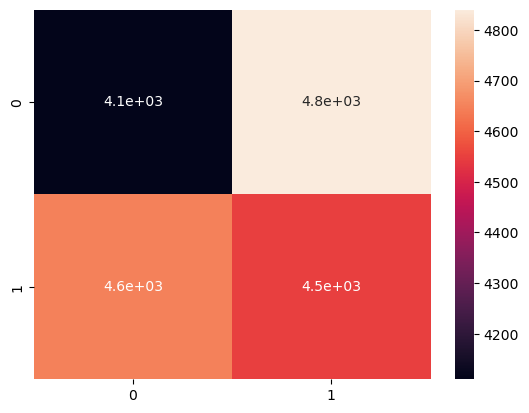

In [71]:
sns.heatmap(CC_test, annot=True)

### For three class non overlapping

In [151]:
LOA_Train_data= pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/train_LOA_nonover.csv',header=None)[1:]
LOA_Test_data= pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LOA_nonover.csv',header=None)[1:]
LOA_Train_data[144][LOA_Train_data[144]==2]=1
train_ar = LOA_Train_data[144]
LOA_Train_data.drop(144,axis=1,inplace=True)
X_train = LOA_Train_data
l1=0.1
l2=0.2
LOA_Test_data[144][LOA_Test_data[144]==2]=1
test_ar = LOA_Test_data[144]
LOA_Test_data.drop(144,axis=1,inplace=True)
X_test = LOA_Test_data
X1_test= np.array(X_test)
X1_train = np.array(X_train) #X
X2_train = X1_train.transpose() #X'
XX_train = np.matmul(X2_train, X1_train) #X*X'
Inv_X_train = inv(XX_train) #inv(X*X')
#A1=y*X' *inv(X*X')
Y_train = np.array(train_ar) #y
YX_train = np.matmul(X2_train, Y_train) #Y*X'
A1_train = np.matmul(YX_train, Inv_X_train)
S_train= np.sign(A1_train)
#A=(y*x’-(lamda2/2)*S)*inv(x*x’+lamda1)
XXL1_train = XX_train+l1
Inv_XXL1_train=inv(XXL1_train)
Temp = (l2/2)*S_train
New_temp = np.matmul(Temp,Inv_XXL1_train)
A_train = YX_train - New_temp
#Validating Model
ZZ1 = np.matmul(X1_train, A_train)
ZZ2 = ZZ1 > ZZ1.mean()
yhat = ZZ2.astype(int)
#Validating with Test data
Z1_test = np.matmul(X1_test, A_train)
Z2_test = Z1_test > Z1_test.mean()
yhat_test = Z2_test.astype(int)
New_LOA_Test_data = pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LOA_nonover.csv',header=None)[1:]
New_LOA_Test_data[144][New_LOA_Test_data[144]==2]=1
New_LOA_Test_data["145"] = yhat_test
New_LOA_Test_data.to_csv('/Users/bhuvanakorrapati/Desktop/output1/new_train_LOA_nonover.csv',index = False)
#Confusion matrix
CC_test = confusion_matrix(test_ar, yhat_test)
#Confusion Matrix Array to Data Frame
Confusion_Matrix = pd.DataFrame(CC_test)
# save the dataframe as a csv file
Confusion_Matrix.to_csv('/Users/bhuvanakorrapati/Desktop/output1/Confuison_Matrix.csv',index = False)

print(Confusion_Matrix)
TN = CC_test[0,0]
FP = CC_test[0,1]
FN = CC_test[1,0]
TP = CC_test[1,1]
FPFN = FP+FN
TPTN = TP+TN
Accuracy = 1/(1+(FPFN/TPTN))
print("Our_Accuracy_Score:",Accuracy)
Precision = 1/(1+(FP/TP))
print("Our_Precision_Score:",Precision)
Sensitivity = 1/(1+(FN/TP))
print("Our_Sensitivity_Score:",Sensitivity)
Specificity = 1/(1+(FP/TN))
print("Our_Specificity_Score:",Specificity)



    0   1
0  18  42
1  79  72
Our_Accuracy_Score: 0.42654028436018954
Our_Precision_Score: 0.631578947368421
Our_Sensitivity_Score: 0.4768211920529801
Our_Specificity_Score: 0.3


<AxesSubplot:>

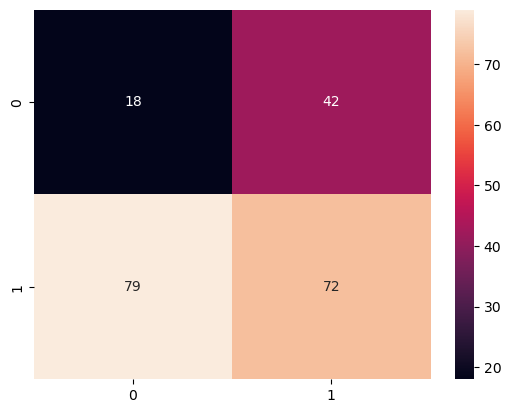

In [152]:
sns.heatmap(CC_test, annot=True)

### For three class overlapping dataset

In [74]:
LOA_overlap_Train_data= pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/train_LOA_over.csv',header=None)[1:]
LOA_overlap_Test_data= pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LOA_over.csv',header=None)[1:]
LOA_overlap_Train_data[144][LOA_overlap_Train_data[144]==2]=1
train_ar = LOA_overlap_Train_data[144]
LOA_overlap_Train_data.drop(144,axis=1,inplace=True)
X_train = LOA_overlap_Train_data
l1=0.1
l2=0.2
LOA_overlap_Test_data[144][LOA_overlap_Test_data[144]==2]=1
test_ar = LOA_overlap_Test_data[144]
LOA_overlap_Test_data.drop(144,axis=1,inplace=True)
X_test = LOA_overlap_Test_data
X1_test= np.array(X_test)
X1_train = np.array(X_train) #X
X2_train = X1_train.transpose() #X'
XX_train = np.matmul(X2_train, X1_train) #X*X'
Inv_X_train = inv(XX_train) #inv(X*X')
#A1=y*X' *inv(X*X')
Y_train = np.array(train_ar) #y
YX_train = np.matmul(X2_train, Y_train) #Y*X'
A1_train = np.matmul(YX_train, Inv_X_train)
S_train= np.sign(A1_train)
#A=(y*x’-(lamda2/2)*S)*inv(x*x’+lamda1)
XXL1_train = XX_train+l1
Inv_XXL1_train=inv(XXL1_train)
Temp = (l2/2)*S_train
New_temp = np.matmul(Temp,Inv_XXL1_train)
A_train = YX_train - New_temp
#Validating Model
ZZ1 = np.matmul(X1_train, A_train)
ZZ2 = ZZ1 > ZZ1.mean()
yhat = ZZ2.astype(int)
#Validating with Test data
Z1_test = np.matmul(X1_test, A_train)
Z2_test = Z1_test > Z1_test.mean()
yhat_test = Z2_test.astype(int)
New_LOA_overlap_Test_data = pd.read_csv('/Users/bhuvanakorrapati/Desktop/output1/test_LOA_over.csv',header=None)[1:]
New_LOA_overlap_Test_data[144][New_LOA_overlap_Test_data[144]==2]=1
New_LOA_overlap_Test_data["145"] = yhat_test
New_LOA_overlap_Test_data.to_csv('/Users/bhuvanakorrapati/Desktop/output1/new_train_LOA_over.csv',index = False)
#Confusion matrix
CC_test = confusion_matrix(test_ar, yhat_test)
#Confusion Matrix Array to Data Frame
Confusion_Matrix = pd.DataFrame(CC_test)
# save the dataframe as a csv file
Confusion_Matrix.to_csv('/Users/bhuvanakorrapati/Desktop/output1/Confuison_Matrix.csv',index = False)

print(Confusion_Matrix)
TN = CC_test[0,0]
FP = CC_test[0,1]
FN = CC_test[1,0]
TP = CC_test[1,1]
FPFN = FP+FN
TPTN = TP+TN
Accuracy = 1/(1+(FPFN/TPTN))
print("Our_Accuracy_Score:",Accuracy)
Precision = 1/(1+(FP/TP))
print("Our_Precision_Score:",Precision)
Sensitivity = 1/(1+(FN/TP))
print("Our_Sensitivity_Score:",Sensitivity)
Specificity = 1/(1+(FP/TN))
print("Our_Specificity_Score:",Specificity)



      0     1  2
0  4188  4888  0
1  4666  4401  0
2     1     0  0
Our_Accuracy_Score: 0.47340572121479363
Our_Precision_Score: 0.4737861987296803
Our_Sensitivity_Score: 0.485386566670343
Our_Specificity_Score: 0.4614367562802997


<AxesSubplot:>

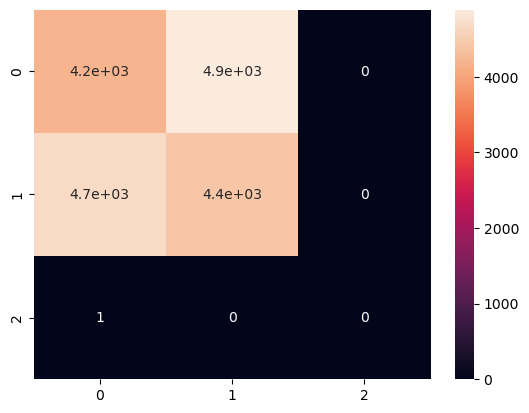

In [75]:
sns.heatmap(CC_test, annot=True)

### RANDOM FOREST ALGORITHM


In [101]:
RF_Train_data= pd.read_csv('/Users/bhuvanakorrapati/Desktop/output/merge_LO.csv',header=None)[1:]


In [102]:
X = RF_Train_data.iloc[:, 0:143].values
y = RF_Train_data.iloc[:, 143].values

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [125]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=90, random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(format(accuracy_score(y_test, y_pred)))


0.0425531914893617


In [106]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test, y_pred))

In [107]:
y_test

array([205,  62, 135, 163,  44, 185, 115, 144,  56, 152,  45, 146,  86,
       104, 183, 196, 159, 126, 105, 117, 170, 119, 169, 127, 200, 124,
        88, 148, 156, 180, 219,  62, 111,  85, 150, 167, 197, 159,  88,
       203, 157,  79, 114,  64, 104, 115, 178, 136, 118, 150,  84, 187,
       191,  53,  67, 125, 150, 156, 146, 101,  94, 172, 176, 170, 120,
       117, 187, 114, 127, 174, 158, 155, 180, 202, 159, 171, 119, 187,
       144, 152, 170, 161, 180,  95,  46, 120, 179, 150, 141, 122, 190,
       177, 137, 147,  89, 143, 111, 158, 168, 186, 130,  78, 166, 165,
       119, 118, 113, 116, 112, 140, 115, 165, 109, 166, 108, 135, 125,
       171, 123, 163, 184, 191, 159, 100, 165, 128,  15,  69, 157, 144,
       158, 128,  73,  65, 204, 145, 140,  77, 211, 117, 110])

In [108]:
print(y_pred)

[193  68 136 137  41 151 121 139  79 137 129 138  94  94 195 192 155 124
 115 121 162 113 179 128 194  97  75 138 146 181 223  49  96  96 161 162
 188 162  94 211 179  86 117  86  79  96 189 134 115 124  21 188 185  37
  68 129 137 179 148  95  96 174 177 181 115 111 181 110 130 181 173 110
 188 184 178 184 124 151 139 155 184 155 155  79  37  81 172 137 146 122
 214 188 144 160  97 140  96 149 164 184 120  52 170 161 124 129  97 115
 112 159  79 162 116 184  96 113 115 164 115  61 185 184  74  93 164 114
  15 140 161 138 149 137  66  68 207 137 135  22 187 112 110]


In [109]:
cm = confusion_matrix(y_test, y_pred)
TN = cm[1,1]
FP = cm[1,0]
FN = cm[0,1]
TP = cm[0,0]
FPFN = FP+FN
TPTN = TP+TN
Accuracy = 1/(1+(FPFN/TPTN))
print("Our_Accuracy_Score:",Accuracy)
Precision = 1/(1+(FP/TP))
print("Our_Precision_Score:",Precision)
Sensitivity = 1/(1+(FN/TP))
print("Our_Sensitivity_Score:",Sensitivity)
Specificity = 1/(1+(FP/TN))
print("Our_Specificity_Score:",Specificity)


Our_Accuracy_Score: 1.0
Our_Precision_Score: 1.0
Our_Sensitivity_Score: 1.0
Our_Specificity_Score: nan


/var/folders/mr/z5vbd8j17q99ss77c6j4__2h0000gn/T/ipykernel_1904/2821044550.py:14: RuntimeWarning: invalid value encountered in long_scalars
  Specificity = 1/(1+(FP/TN))


<AxesSubplot:>

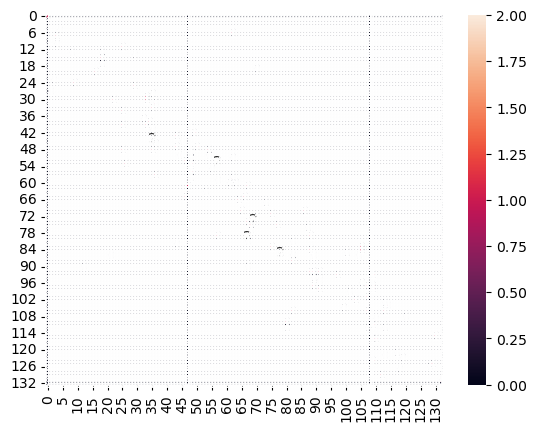

In [126]:
train_ar = RF_Train_data[144]
RF_Train_data.drop(144,axis=1,inplace=True)
X_train = RF_Train_data
X1_train= np.array(X_train)
Y_train = np.array(train_ar) #y


In [127]:
rF = RandomForestClassifier(random_state=0, n_estimators=500, oob_score=True, n_jobs=-1)
model = rF.fit(X_train,Y_train)


In [128]:
rF.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=0)

In [129]:
rF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=0)

In [130]:
X_test = X[TR:row,:]

NameError: name 'TR' is not defined

In [131]:
yhat_test = model.predict(X_test)

ValueError: X has 143 features, but RandomForestClassifier is expecting 144 features as input.

In [139]:
importance = model.feature_importances_
indices = importance.argsort()[::-1]
std = np.std([model.feature_importances_ for model in rF.estimators_], axis=0)
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))


1. feature 135 (0.017115)
2. feature 138 (0.016353)
3. feature 7 (0.013638)
4. feature 4 (0.013421)
5. feature 0 (0.012266)
6. feature 2 (0.011906)
7. feature 126 (0.011630)
8. feature 14 (0.011350)
9. feature 131 (0.010808)
10. feature 140 (0.010630)
11. feature 58 (0.010382)
12. feature 5 (0.010338)
13. feature 8 (0.010024)
14. feature 109 (0.009870)
15. feature 136 (0.009743)
16. feature 35 (0.009632)
17. feature 137 (0.009558)
18. feature 23 (0.009422)
19. feature 21 (0.009414)
20. feature 130 (0.009368)
21. feature 119 (0.009274)
22. feature 71 (0.009099)
23. feature 132 (0.009075)
24. feature 1 (0.009058)
25. feature 127 (0.009031)
26. feature 3 (0.008608)
27. feature 120 (0.008580)
28. feature 133 (0.008547)
29. feature 70 (0.008516)
30. feature 24 (0.008496)
31. feature 142 (0.008492)
32. feature 38 (0.008453)
33. feature 143 (0.008240)
34. feature 86 (0.008229)
35. feature 40 (0.008164)
36. feature 114 (0.008069)
37. feature 134 (0.008052)
38. feature 12 (0.007865)
39. feature